In [24]:
import numpy as np
from scipy import stats
import random
import pandas as pd

### Распределение Тьюки

In [25]:
def Tukey(m, d, sigma, delta, N = 100):
    X = [random.gauss(m, d) for i in range(N)]
    Y = [random.gauss(m, sigma) for i in range(N)]
    Z = [random.random() for i in range(N)]
    U = [X[i] if Z[i] > delta else Y[i] for i in range(N)]
    return U

In [26]:
def mean(X):
    return sum(X)/len(X)

### Критерий Стьюдента


In [27]:
def Stud(X, Y):
    Xs = mean(X)
    Ys = mean(Y)
    m = len(X)
    n = len(Y)
    S = (((sum([(x - Xs) ** 2 for x in X])) + sum([(y - Ys) for y in Y])) / (m + n)) ** 0.5
    T = - (Xs - Ys) / (S * (1/m + 1/n) ** 0.5)
    if T > 1.65:
        return 1
    return 0

In [28]:
def rang(X,Y):
    Z = sorted(X + Y)
    R = []
    XY = []
    i = 1
    while i <= len(Z):
        c = Z.count(Z[i-1])
        if c == 1:
            R.append(i)
            if Z[i-1] in X:
                XY.append('x')
            else:
                XY.append('y')
        else:
            xs = X.count(Z[i-1])
            for j in range(c):
                R.append(i + (c-1) / 2)
            for j in range(xs):
                XY.append('x')
            for j in range(c - xs):
                XY.append('y')
        i+=c
    return R,XY

### Критерий Уилкоксона

In [29]:
def Wilc(X,Y):
    m = len(X)
    n = len(Y)
    R, XY = rang(X, Y)
    W = sum([R[i] for i in range(len(R)) if XY[i] == 'y'])
    M = (m + n + 1) * m / 2
    D = (m + n + 1) * m * n / 12
    W = (W - M) / D ** 0.5
    if W > 1.645:
        return 1
    return 0

In [30]:
X_Stud = Tukey(0, 0.9, 0, 0.3, 20)
Y_Stud = Tukey(0.25, 0.9, 0, 0.3, 20)
Stud(X_Stud,Y_Stud)

1

In [31]:
X_Stud1 = Tukey(0, 0.9, 0, 0.9, 50)
Y_Stud1 = Tukey(1, 0.9, 0.3, 0.9, 50)
Wilc(X_Stud1,Y_Stud1)

1

In [32]:
sigma = np.linspace(16,30,100)
plot1 = np.zeros((100))
plot2 = np.zeros((100))
for i in range(0,100):
    Wilcoxon_error = 0
    Student_error = 0
    for j in range(0,100):
        X_Stud = Tukey(0, 3, sigma[i], 0.1, 100)
        Y_Stud = Tukey(2, 3, sigma[i], 0.1, 100)
        Wilcoxon_error += Wilc(X_Stud,Y_Stud)
        Student_error += Stud(X_Stud,Y_Stud)
    plot1[i] = (100-Wilcoxon_error)/100
    plot2[i] = (100-Student_error)/100

In [33]:
plot1

array([0.  , 0.01, 0.02, 0.03, 0.03, 0.01, 0.02, 0.01, 0.02, 0.  , 0.  ,
       0.02, 0.03, 0.01, 0.  , 0.  , 0.01, 0.03, 0.  , 0.02, 0.02, 0.  ,
       0.03, 0.01, 0.02, 0.01, 0.  , 0.  , 0.02, 0.05, 0.01, 0.  , 0.01,
       0.02, 0.  , 0.  , 0.01, 0.02, 0.05, 0.01, 0.03, 0.02, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.03, 0.  , 0.  ,
       0.  , 0.03, 0.02, 0.01, 0.01, 0.  , 0.  , 0.02, 0.02, 0.  , 0.  ,
       0.03, 0.02, 0.02, 0.01, 0.02, 0.  , 0.01, 0.01, 0.02, 0.02, 0.  ,
       0.03, 0.04, 0.01, 0.01, 0.03, 0.  , 0.  , 0.02, 0.01, 0.02, 0.04,
       0.  , 0.03, 0.01, 0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01,
       0.  ])

In [34]:
plot2

array([0.12, 0.22, 0.07, 0.15, 0.13, 0.15, 0.14, 0.13, 0.18, 0.11, 0.13,
       0.22, 0.1 , 0.18, 0.14, 0.07, 0.14, 0.17, 0.16, 0.15, 0.13, 0.15,
       0.21, 0.18, 0.17, 0.21, 0.16, 0.14, 0.23, 0.25, 0.19, 0.18, 0.19,
       0.19, 0.19, 0.17, 0.25, 0.18, 0.25, 0.25, 0.21, 0.21, 0.21, 0.23,
       0.23, 0.22, 0.2 , 0.27, 0.25, 0.24, 0.25, 0.39, 0.28, 0.29, 0.34,
       0.31, 0.29, 0.28, 0.3 , 0.26, 0.27, 0.21, 0.25, 0.22, 0.25, 0.29,
       0.33, 0.34, 0.31, 0.32, 0.34, 0.37, 0.36, 0.25, 0.29, 0.26, 0.32,
       0.28, 0.36, 0.34, 0.37, 0.24, 0.33, 0.29, 0.32, 0.35, 0.34, 0.39,
       0.35, 0.33, 0.35, 0.35, 0.37, 0.4 , 0.35, 0.39, 0.37, 0.34, 0.35,
       0.35])

In [14]:
import matplotlib.pyplot as plt

### График ошибок второго рода при изменении sigma

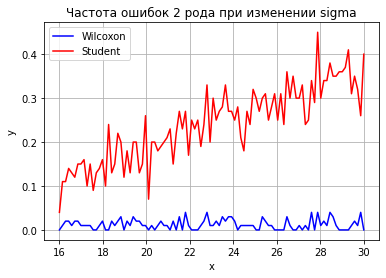

In [15]:
x = np.linspace(16,30,100)
y = plot1
y2 = plot2
fig, ax = plt.subplots()
plt.title("Частота ошибок 2 рода при изменении sigma")
ax.plot(x, y, label = 'Wilcoxon',c = "b")
ax.plot(x, y2, label = 'Student',c = "r")
ax.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#plt.plot(x, y, c = "b")
#plt.plot(x, y2, c = "g")

### График ошибок второго рода при изменении delta

In [16]:
delta = np.linspace(0,1,100)
plot3 = np.zeros((100))
plot4 = np.zeros((100))
for i in range(0,100):
    Student_error = 0
    Wilcoxon_error = 0
    for j in range(0,100):
        X_Stud = Tukey(0, 3, 16, delta[i], 100)
        Y_Stud = Tukey(2, 3, 16, delta[i], 100)
        Wilcoxon_error += Wilc(X_Stud,Y_Stud)
        Student_error += Stud(X_Stud,Y_Stud)
    plot3[i] = (100-Wilcoxon_error)/100
    plot4[i] = (100-Student_error)/100

In [17]:
plot3

array([0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.02, 0.02, 0.01, 0.  , 0.02,
       0.  , 0.02, 0.01, 0.03, 0.02, 0.05, 0.01, 0.06, 0.02, 0.06, 0.02,
       0.1 , 0.11, 0.09, 0.13, 0.08, 0.04, 0.11, 0.15, 0.13, 0.16, 0.16,
       0.23, 0.11, 0.17, 0.17, 0.24, 0.22, 0.21, 0.27, 0.25, 0.25, 0.31,
       0.34, 0.32, 0.29, 0.34, 0.41, 0.38, 0.38, 0.43, 0.44, 0.39, 0.56,
       0.52, 0.53, 0.41, 0.5 , 0.51, 0.58, 0.6 , 0.55, 0.58, 0.62, 0.51,
       0.57, 0.62, 0.58, 0.62, 0.68, 0.69, 0.72, 0.59, 0.57, 0.65, 0.68,
       0.75, 0.71, 0.75, 0.69, 0.65, 0.74, 0.78, 0.71, 0.67, 0.77, 0.78,
       0.7 , 0.78, 0.71, 0.85, 0.7 , 0.87, 0.76, 0.76, 0.73, 0.76, 0.79,
       0.79])

In [18]:
plot4

array([0.  , 0.01, 0.  , 0.02, 0.01, 0.03, 0.04, 0.06, 0.08, 0.07, 0.06,
       0.11, 0.12, 0.16, 0.19, 0.14, 0.23, 0.22, 0.32, 0.18, 0.24, 0.21,
       0.33, 0.28, 0.22, 0.31, 0.21, 0.25, 0.34, 0.32, 0.34, 0.38, 0.33,
       0.41, 0.36, 0.36, 0.36, 0.4 , 0.38, 0.45, 0.5 , 0.45, 0.36, 0.46,
       0.46, 0.46, 0.43, 0.39, 0.52, 0.43, 0.5 , 0.45, 0.55, 0.51, 0.56,
       0.52, 0.54, 0.38, 0.44, 0.49, 0.51, 0.55, 0.53, 0.53, 0.57, 0.47,
       0.49, 0.53, 0.52, 0.54, 0.55, 0.59, 0.58, 0.47, 0.43, 0.56, 0.55,
       0.6 , 0.55, 0.63, 0.59, 0.52, 0.6 , 0.61, 0.62, 0.51, 0.65, 0.6 ,
       0.57, 0.61, 0.53, 0.66, 0.52, 0.66, 0.63, 0.64, 0.5 , 0.57, 0.54,
       0.54])

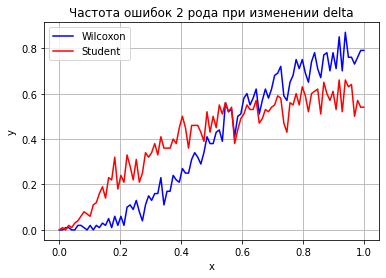

In [19]:
x = np.linspace(0,1,100)
y = plot3
y2 = plot4
fig, ax = plt.subplots()
plt.title("Частота ошибок 2 рода при изменении delta")
ax.plot(x, y, label = 'Wilcoxon',c = "b")
ax.plot(x, y2, label = 'Student',c = "r")
ax.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#plt.plot(x, y, c = "b")
#plt.plot(x, y2, c = "g")

### График ошибок второго рода при изменении МО

In [20]:
mo = np.linspace(0,3,100)
plot5 = np.zeros((100))
plot6 = np.zeros((100))
for i in range(0,100):
    Student_error = 0
    Wilcoxon_error = 0
    for j in range(0,100):
        X_Stud = Tukey(0, 3, 16, 0.1, 100)
        Y_Stud = Tukey(mo[i], 3, 16, 0.1, 100)
        Wilcoxon_error += Wilc(X_Stud,Y_Stud)
        Student_error += Stud(X_Stud,Y_Stud)
    plot5[i] = (100-Wilcoxon_error)/100
    plot6[i] = (100-Student_error)/100

In [21]:
plot5

array([0.89, 0.94, 0.97, 0.93, 0.91, 0.87, 0.88, 0.93, 0.84, 0.86, 0.85,
       0.85, 0.82, 0.81, 0.76, 0.76, 0.71, 0.65, 0.62, 0.62, 0.66, 0.65,
       0.7 , 0.62, 0.61, 0.58, 0.57, 0.52, 0.5 , 0.44, 0.4 , 0.3 , 0.41,
       0.29, 0.37, 0.33, 0.32, 0.28, 0.18, 0.25, 0.2 , 0.19, 0.22, 0.13,
       0.22, 0.14, 0.12, 0.12, 0.15, 0.15, 0.1 , 0.1 , 0.06, 0.08, 0.08,
       0.03, 0.04, 0.04, 0.02, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.  ,
       0.01, 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [22]:
plot6

array([0.8 , 0.86, 0.91, 0.89, 0.75, 0.77, 0.78, 0.86, 0.78, 0.8 , 0.8 ,
       0.77, 0.75, 0.76, 0.79, 0.67, 0.67, 0.62, 0.61, 0.69, 0.58, 0.53,
       0.63, 0.59, 0.55, 0.6 , 0.67, 0.55, 0.59, 0.48, 0.53, 0.43, 0.55,
       0.46, 0.42, 0.44, 0.51, 0.44, 0.36, 0.34, 0.46, 0.33, 0.41, 0.23,
       0.29, 0.27, 0.21, 0.26, 0.28, 0.33, 0.19, 0.32, 0.18, 0.22, 0.23,
       0.21, 0.09, 0.19, 0.16, 0.21, 0.14, 0.08, 0.11, 0.1 , 0.12, 0.08,
       0.11, 0.07, 0.08, 0.06, 0.08, 0.06, 0.1 , 0.08, 0.11, 0.04, 0.06,
       0.02, 0.09, 0.05, 0.04, 0.03, 0.01, 0.06, 0.04, 0.01, 0.06, 0.03,
       0.03, 0.01, 0.01, 0.02, 0.02, 0.01, 0.  , 0.  , 0.01, 0.03, 0.01,
       0.01])

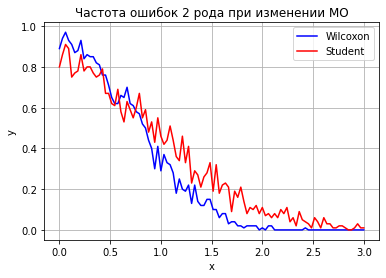

In [23]:
x = np.linspace(0,3,100)
y = plot5
y2 = plot6
fig, ax = plt.subplots()
plt.title("Частота ошибок 2 рода при изменении МО")
ax.plot(x, y, label = 'Wilcoxon',c = "b")
ax.plot(x, y2, label = 'Student',c = "r")
ax.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
#plt.plot(x, y, c = "b")
#plt.plot(x, y2, c = "g")